## Estimadores ML con 15 variables

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargamos el dataset anterior
dataset = pd.read_csv("df1_eda.csv")
dataset

idClient  Score CountryLocation  Gender  Age  Tenure  Games Balance  \
0            1    619          France       1   42       2           0.00   
1            2    608           Spain       1   41       1       83807.86   
2            3    502          France       1   42       8      159660.80   
3            4    699          France       1   39       1           0.00   
4            5    850           Spain       1   43       2      125510.82   
...        ...    ...             ...     ...  ...     ...            ...   
9995      9996    771          France       0   39       5           0.00   
9996      9997    516          France       0   35      10       57369.61   
9997      9998    709          France       1   36       7           0.00   
9998      9999    772         Germany       0   42       3       75075.31   
9999     10000    792          France       1   28       4      130142.79   

      NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  \
0                 1                 1               1         101348.88   
1                 1                 0               1         112542.58   
2                 3                 1               0         113931.57   
3                 2                 0               0          93826.63   
4                 1                 1               1          79084.10   
...             ...               ...             ...               ...   
9995              2                 1               0          96270.64   
9996              1                 1               1         101699.77   
9997              1                 0               1          42085.58   
9998              2                 1               0          92888.52   
9999              1                 1               0          38190.78   

      Churn ScoreGroup     AgeGroup GamesBalanceGroup CumScoreGroup  
0         1       GOLD  Young Adult               LOW        Expert  
1         0       GOLD  Young Adult            MEDIUM        Expert  
2         1     SILVER  Young Adult      INTERMEDIATE        Expert  
3         0       GOLD  Young Adult               LOW  Intermediate  
4         0   PLATINUM  Young Adult      INTERMEDIATE  Intermediate  
...     ...        ...          ...               ...           ...  
9995      0   PLATINUM  Young Adult               LOW  Intermediate  
9996      0     SILVER      Student               LOW        Expert  
9997      1       GOLD  Young Adult               LOW        Rookie  
9998      1   PLATINUM  Young Adult            MEDIUM  Intermediate  
9999      0   PLATINUM      Student      INTERMEDIATE        Rookie  

[10000 rows x 16 columns]

## Procesado
https://scikit-learn.org/stable/modules/preprocessing.html

In [4]:
# Seleccionamos las variables numéricas
num_features = dataset.select_dtypes(include=[np.number])
num_features.dtypes

idClient              int64
Score                 int64
Gender                int64
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [5]:
from sklearn import preprocessing

In [6]:
columnasX = ['Score', 'Age','Tenure',
           'Games Balance','NumOfProducts',
           'Cumulative score']

In [7]:
# Data normalization
normalized_X = preprocessing.normalize(dataset[columnasX])
normalized_X

array([[6.10750116e-03, 4.14402340e-04, 1.97334448e-05, 0.00000000e+00,
        9.86672238e-06, 9.99981263e-01],
       [4.33292479e-03, 2.92187362e-04, 7.12652104e-06, 5.97258477e-01,
        7.12652104e-06, 8.02037064e-01],
       [2.55935218e-03, 2.14129067e-04, 4.07864889e-05, 8.14000431e-01,
        1.52949333e-05, 5.80858589e-01],
       ...,
       [1.68442289e-02, 8.55278194e-04, 1.66304093e-04, 0.00000000e+00,
        2.37577276e-05, 9.99857746e-01],
       [6.46366317e-03, 3.51650069e-04, 2.51178621e-05, 6.28577094e-01,
        1.67452414e-05, 7.77720344e-01],
       [5.83928708e-03, 2.06439442e-04, 2.94913489e-05, 9.59521607e-01,
        7.37283723e-06, 2.81574404e-01]])

In [8]:
# Data Standardization
standarization_X = preprocessing.scale(dataset[columnasX])
standarization_X

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -0.91158349,
        -1.07636976]])

In [9]:
for stand in columnasX:
    dataset[stand] = preprocessing.scale(dataset[stand], axis=0,
                       with_mean=True,
                       with_std=True)

In [10]:
dataset.head(10)

idClient     Score CountryLocation  Gender       Age    Tenure  \
0         1 -0.326221          France       1  0.293517 -1.041760   
1         2 -0.440036           Spain       1  0.198164 -1.387538   
2         3 -1.536794          France       1  0.293517  1.032908   
3         4  0.501521          France       1  0.007457 -1.387538   
4         5  2.063884           Spain       1  0.388871 -1.041760   
5         6 -0.057205           Spain       0  0.484225  1.032908   
6         7  1.774174          France       0  1.056346  0.687130   
7         8 -2.840488         Germany       1 -0.946079 -0.350204   
8         9 -1.547141          France       0  0.484225 -0.350204   
9        10  0.346319          France       0 -1.136786 -1.041760   

   Games Balance  NumOfProducts  HasPremiumAccess  IsActiveMember  \
0      -1.225848      -0.911583                 1               1   
1       0.117350      -0.911583                 0               1   
2       1.333053       2.527057                 1               0   
3      -1.225848       0.807737                 0               0   
4       0.785728      -0.911583                 1               1   
5       0.597329       0.807737                 1               0   
6      -1.225848       0.807737                 1               1   
7       0.618019       4.246377                 1               0   
8       1.050820       0.807737                 0               1   
9       0.931463      -0.911583                 1               1   

   Cumulative score  Churn ScoreGroup     AgeGroup GamesBalanceGroup  \
0          0.021886      1       GOLD  Young Adult               LOW   
1          0.216534      0       GOLD  Young Adult            MEDIUM   
2          0.240687      1     SILVER  Young Adult      INTERMEDIATE   
3         -0.108918      0       GOLD  Young Adult               LOW   
4         -0.365276      0   PLATINUM  Young Adult      INTERMEDIATE   
5          0.863650      1       GOLD  Young Adult            MEDIUM   
6         -1.565487      0   PLATINUM        Adult               LOW   
7          0.334854      1     BRONCE      Student            MEDIUM   
8         -0.437329      0     SILVER  Young Adult      INTERMEDIATE   
9         -0.493230      0       GOLD      Student      INTERMEDIATE   

  CumScoreGroup  
0        Expert  
1        Expert  
2        Expert  
3  Intermediate  
4  Intermediate  
5   GrandMaster  
6   Entry-Level  
7        Expert  
8        Novice  
9        Novice

## Binarización

In [11]:
# Evaluamos las variables categoricas
cat_feature = dataset.dtypes == object

# Guardamos las variables categóricas en un array
cat_cols = dataset.columns[cat_feature].tolist()

# Binarizamos
dataset = pd.get_dummies(dataset, columns=cat_cols)

# Observaremos los resultados
dataset.head(10)

idClient     Score  Gender       Age    Tenure  Games Balance  \
0         1 -0.326221       1  0.293517 -1.041760      -1.225848   
1         2 -0.440036       1  0.198164 -1.387538       0.117350   
2         3 -1.536794       1  0.293517  1.032908       1.333053   
3         4  0.501521       1  0.007457 -1.387538      -1.225848   
4         5  2.063884       1  0.388871 -1.041760       0.785728   
5         6 -0.057205       0  0.484225  1.032908       0.597329   
6         7  1.774174       0  1.056346  0.687130      -1.225848   
7         8 -2.840488       1 -0.946079 -0.350204       0.618019   
8         9 -1.547141       0  0.484225 -0.350204       1.050820   
9        10  0.346319       0 -1.136786 -1.041760       0.931463   

   NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  ...  \
0      -0.911583                 1               1          0.021886  ...   
1      -0.911583                 0               1          0.216534  ...   
2       2.527057                 1               0          0.240687  ...   
3       0.807737                 0               0         -0.108918  ...   
4      -0.911583                 1               1         -0.365276  ...   
5       0.807737                 1               0          0.863650  ...   
6       0.807737                 1               1         -1.565487  ...   
7       4.246377                 1               0          0.334854  ...   
8       0.807737                 0               1         -0.437329  ...   
9      -0.911583                 1               1         -0.493230  ...   

   GamesBalanceGroup_LOW  GamesBalanceGroup_MEDIUM  CumScoreGroup_Commodoro  \
0                      1                         0                        0   
1                      0                         1                        0   
2                      0                         0                        0   
3                      1                         0                        0   
4                      0                         0                        0   
5                      0                         1                        0   
6                      1                         0                        0   
7                      0                         1                        0   
8                      0                         0                        0   
9                      0                         0                        0   

   CumScoreGroup_Entry-Level  CumScoreGroup_Expert  CumScoreGroup_GrandMaster  \
0                          0                     1                          0   
1                          0                     1                          0   
2                          0                     1                          0   
3                          0                     0                          0   
4                          0                     0                          0   
5                          0                     0                          1   
6                          1                     0                          0   
7                          0                     1                          0   
8                          0                     0                          0   
9                          0                     0                          0   

   CumScoreGroup_Intermediate  CumScoreGroup_Master  CumScoreGroup_Novice  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     0   
3                           1                     0                     0   
4                           1                     0                     0   
5                           0                     0                     0   
6                           0                     0                     0   
7                           

In [12]:
dataset.columns.tolist()

['idClient',
 'Score',
 'Gender',
 'Age',
 'Tenure',
 'Games Balance',
 'NumOfProducts',
 'HasPremiumAccess',
 'IsActiveMember',
 'Cumulative score',
 'Churn',
 'CountryLocation_France',
 'CountryLocation_Germany',
 'CountryLocation_Spain',
 'ScoreGroup_BRONCE',
 'ScoreGroup_GOLD',
 'ScoreGroup_PLATINUM',
 'ScoreGroup_SILVER',
 'AgeGroup_Adult',
 'AgeGroup_Mid-Senior',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Young Adult',
 'GamesBalanceGroup_HIGH',
 'GamesBalanceGroup_INTERMEDIATE',
 'GamesBalanceGroup_LOW',
 'GamesBalanceGroup_MEDIUM',
 'CumScoreGroup_Commodoro',
 'CumScoreGroup_Entry-Level',
 'CumScoreGroup_Expert',
 'CumScoreGroup_GrandMaster',
 'CumScoreGroup_Intermediate',
 'CumScoreGroup_Master',
 'CumScoreGroup_Novice',
 'CumScoreGroup_Rookie']

## Correlación

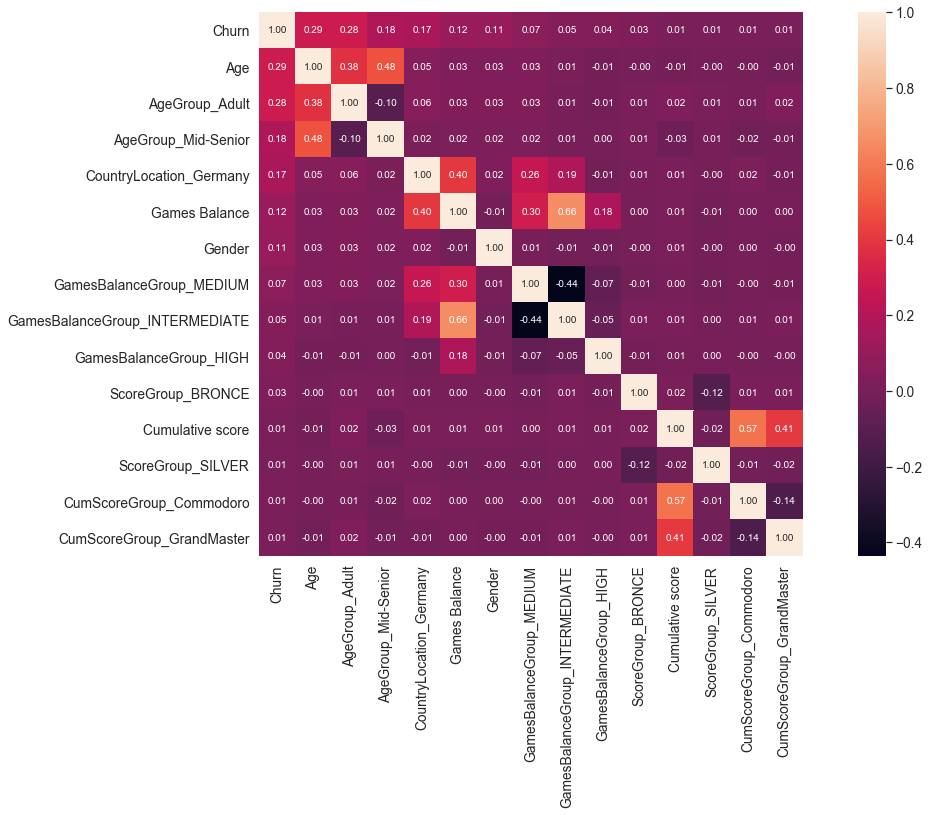

In [13]:
#churn correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(20,10))
corrmat = dataset.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modelado

In [14]:
# Features 15 variables
cols 

Index(['Churn', 'Age', 'AgeGroup_Adult', 'AgeGroup_Mid-Senior',
       'CountryLocation_Germany', 'Games Balance', 'Gender',
       'GamesBalanceGroup_MEDIUM', 'GamesBalanceGroup_INTERMEDIATE',
       'GamesBalanceGroup_HIGH', 'ScoreGroup_BRONCE', 'Cumulative score',
       'ScoreGroup_SILVER', 'CumScoreGroup_Commodoro',
       'CumScoreGroup_GrandMaster'],
      dtype='object')

In [15]:
X = dataset[cols]
X
X.drop(['Churn'], axis=1, inplace=True)

In [16]:
y = dataset['Churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

In [17]:
# Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X_train.shape, y_train.shape

((8000, 14), (8000,))

## Logistic Regression

In [19]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, ..., 0, 0, 0])

## Modeling Score

Accuracy

In [21]:
performance_auc = {}

In [22]:
logreg_score = round(model.score(X_train, y_train) * 100, 2)
print(logreg_score)
print(classification_report(y_test, predicted_log))

81.68
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.61      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.73      0.62      0.65      2000
weighted avg       0.80      0.82      0.80      2000



In [23]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [24]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc["Regression Logistic"] = roc_auc

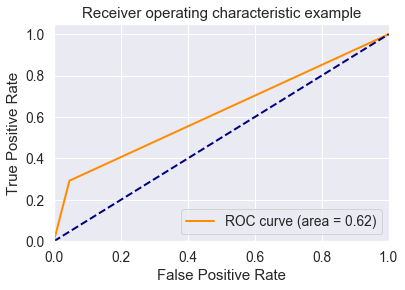

In [25]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Estimadores de Machine Learning - scikitLearn
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [26]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
# Score
dt_score = round(model.score(X_train, y_train)*100, 2)
print(dt_score)
print(classification_report(y_test, predicted_dt))

100.0
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1607
           1       0.36      0.39      0.38       393

    accuracy                           0.74      2000
   macro avg       0.60      0.61      0.61      2000
weighted avg       0.75      0.74      0.75      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

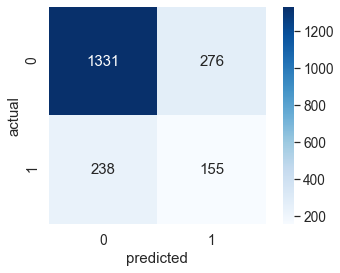

In [29]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [30]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc["Decision Tree"] = roc_auc

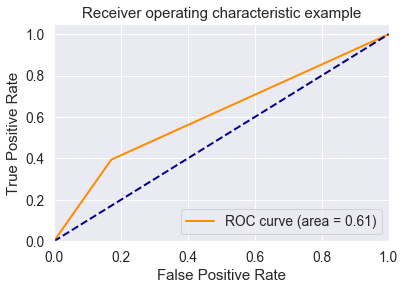

In [31]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [32]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
rf_score = round(model.score(X_train, y_train)*100, 2)
print(rf_score)
print(classification_report(y_test, predicted_rf))

79.45
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

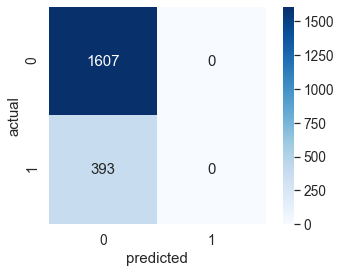

In [35]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [36]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc["Random Forest"] = roc_auc

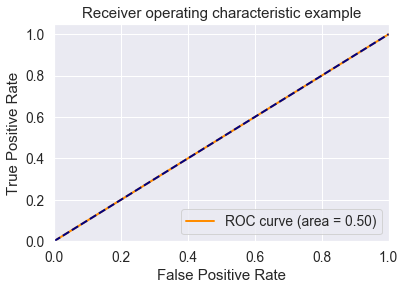

In [37]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## k-nearest neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source [wikipedia - k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [38]:
model = KNeighborsClassifier(5).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Score
knn_score = round(model.score(X_train, y_train)*100, 2)
print(knn_score)
print(classification_report(y_test, predicted_knn))

84.79
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1607
           1       0.49      0.32      0.39       393

    accuracy                           0.80      2000
   macro avg       0.67      0.62      0.64      2000
weighted avg       0.78      0.80      0.78      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

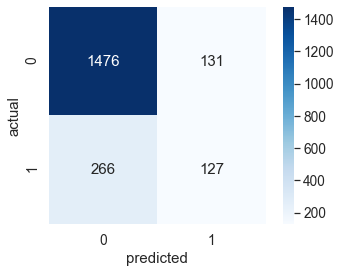

In [41]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [42]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc["KNN"] = roc_auc

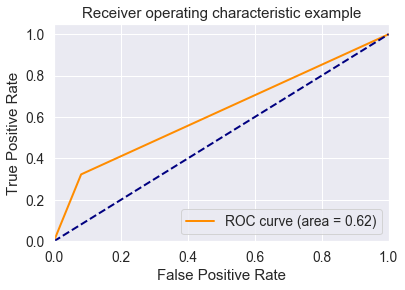

In [43]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

source [wikipedia - SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

In [44]:
model = SVC(probability=True).fit(X_train, y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
predicted_svc = model.predict(X_test)
predicted_svc

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Score
svc_score = round(model.score(X_train, y_train)*100, 2)
print(svc_score)
print(classification_report(y_test, predicted_svc))

82.15
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.67      0.25      0.37       393

    accuracy                           0.83      2000
   macro avg       0.75      0.61      0.63      2000
weighted avg       0.81      0.83      0.80      2000



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

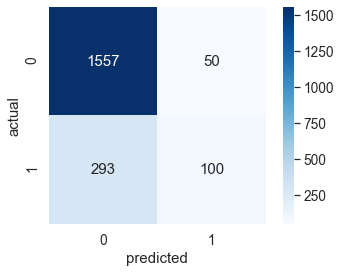

In [47]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_svc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [48]:
# Curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, predicted_svc)
roc_auc = auc(fpr, tpr)
performance_auc["SVM"] = roc_auc

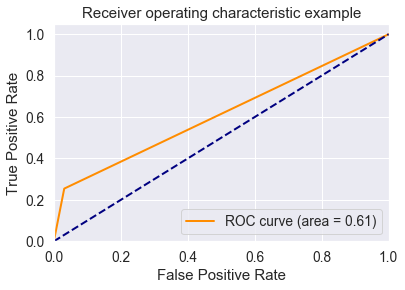

In [49]:
# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Evaluación de los modelos

In [50]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [51]:
models = pd.DataFrame({
    'Models': ['KNN','SVC','RF','DT','LR'],
    'Score':[knn_score,svc_score,rf_score,dt_score,logreg_score]})
models.sort_values(by='Score', ascending=False)

Models   Score
3     DT  100.00
0    KNN   84.79
1    SVC   82.15
4     LR   81.68
2     RF   79.45